In [3]:
import geopandas as gpd
from pathlib import Path

In [4]:
data_folder = Path("data")
fp = data_folder / "austin_pop_2019.gpkg"

data = gpd.read_file(fp)
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


In [6]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [8]:
print(data["geometry"][0])

POLYGON ((615643.4874921399 3338728.496313094, 615645.4769159766 3338776.951016731, 615672.6554451208 3338829.6648063203, 615747.3269086493 3338963.45179916, 615910.777897655 3339269.8602846907, 616037.0066910569 3339471.589454329, 616158.1170371702 3339656.307260439, 616179.5953788057 3339692.218041531, 616195.6752476895 3339719.215327388, 616197.0950229925 3339721.5541628236, 616233.0086959018 3339776.354378601, 616407.3535771375 3340052.191412175, 616429.1665289268 3340155.837022159, 616432.0391106157 3340229.8988806675, 616441.0755958044 3340467.189638856, 616441.3688564864 3340684.761032876, 616452.3016533266 3340788.1820588703, 616475.0991403841 3340853.4841206414, 616528.7425904388 3340951.806774102, 616594.8839026216 3341079.3057522844, 616682.4788553951 3341243.614047442, 616683.9874923173 3341246.512942695, 616686.4470110307 3341251.0828165356, 616689.5594058711 3341256.881616337, 616699.8181527593 3341251.8877565204, 616755.6889208991 3341221.890050649, 616872.9841818035 334

In [16]:
poly = data.geometry.values[0]

for i, coord in enumerate(poly.exterior.coords):
  print(f"{i}: {coord}")

0: (615643.4874921399, 3338728.496313094)
1: (615645.4769159766, 3338776.951016731)
2: (615672.6554451208, 3338829.6648063203)
3: (615747.3269086493, 3338963.45179916)
4: (615910.777897655, 3339269.8602846907)
5: (616037.0066910569, 3339471.589454329)
6: (616158.1170371702, 3339656.307260439)
7: (616179.5953788057, 3339692.218041531)
8: (616195.6752476895, 3339719.215327388)
9: (616197.0950229925, 3339721.5541628236)
10: (616233.0086959018, 3339776.354378601)
11: (616407.3535771375, 3340052.191412175)
12: (616429.1665289268, 3340155.837022159)
13: (616432.0391106157, 3340229.8988806675)
14: (616441.0755958044, 3340467.189638856)
15: (616441.3688564864, 3340684.761032876)
16: (616452.3016533266, 3340788.1820588703)
17: (616475.0991403841, 3340853.4841206414)
18: (616528.7425904388, 3340951.806774102)
19: (616594.8839026216, 3341079.3057522844)
20: (616682.4788553951, 3341243.614047442)
21: (616683.9874923173, 3341246.512942695)
22: (616686.4470110307, 3341251.0828165356)
23: (616689.559

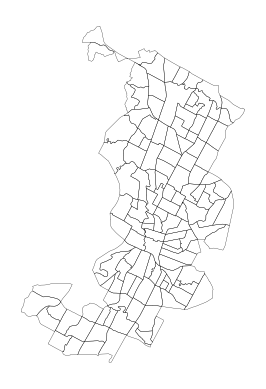

In [21]:
import matplotlib.pyplot as plt

data.plot(facecolor="none", linewidth=0.2)

plt.axis("off")
plt.show()

In [22]:
data.crs.name

'WGS 84 / UTM zone 14N'

In [23]:
data.geometry.centroid

0       POINT (616990.19 3339736.002)
1      POINT (619378.303 3359650.002)
2      POINT (620418.753 3342194.171)
3      POINT (622613.506 3351414.386)
4      POINT (622605.359 3343869.554)
                    ...              
125    POINT (625165.812 3356033.182)
126    POINT (625620.772 3344571.195)
127    POINT (626664.098 3354306.534)
128    POINT (627209.038 3349903.445)
129    POINT (627628.825 3354665.676)
Length: 130, dtype: geometry

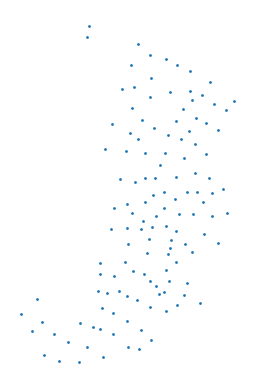

In [24]:
data.centroid.plot(markersize=1)

plt.axis('off')
plt.show()

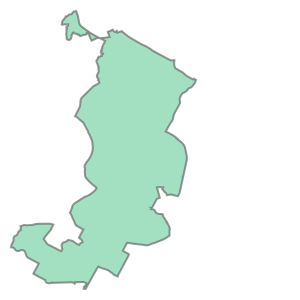

In [25]:
data.union_all()

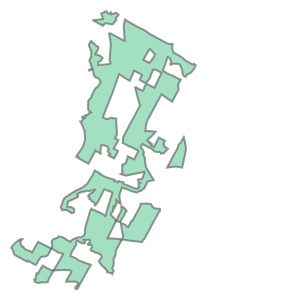

In [37]:
half = len(data) // 2

data_1 = data[:half]
data_2 = data[half:]

data_1.union_all()

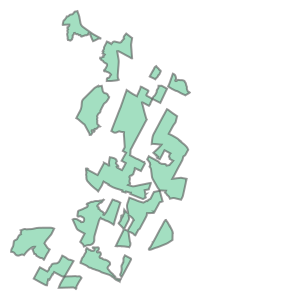

In [35]:
data_2.union_all()

In [39]:
dissolved = data.dissolve(method="coverage")
dissolved.head()

,geometry,pop2019,tract
0,"MULTIPOLYGON (((618353.957 3340531.111, 618350...",6070.0,002422


In [45]:
for poly in dissolved.geometry.iloc[0].geoms:
  print(poly)

POLYGON ((618353.9571889889 3340531.110540003, 618350.074420053 3340525.4230244798, 618247.4188015007 3340366.151345424, 618185.8577181468 3340270.827380491, 618127.3750279165 3340167.4547586096, 618106.3916232373 3340130.427814272, 617961.6194080273 3339866.7413137318, 617878.4293671274 3339722.976352558, 617809.749920778 3339599.549091726, 617675.4953216577 3339358.810428364, 617640.7319083357 3339296.4756889623, 617497.1169237406 3339038.9088217327, 617467.3609277775 3338985.388773644, 617369.0970270301 3338809.212285241, 617293.9809641181 3338674.1930074077, 617241.1651186579 3338578.859533345, 617192.3945488163 3338492.667026561, 617169.1364085581 3338451.7388757295, 617127.6394998438 3338378.5866381247, 617088.6493777658 3338305.5727484794, 617013.2667459601 3338168.110750076, 616960.7384219004 3338072.1147861346, 616909.0484699069 3337979.355233965, 616888.0757460437 3337941.3339408915, 616879.097061824 3337924.943259679, 616870.8826883067 3337909.8949540313, 616852.9639924563 3

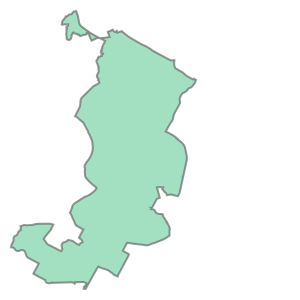

In [46]:
dissolved.geometry[0]

In [48]:
bounding_box = data.envelope.head()
bounding_box

0    POLYGON ((615643.487 3337909.895, 618358.033 3...
1    POLYGON ((618529.497 3358797, 620192.632 33587...
2    POLYGON ((619198.456 3340875.421, 621733.88 33...
3    POLYGON ((621599.087 3350329.32, 623714.366 33...
4    POLYGON ((621630.247 3343015.679, 624133.189 3...
dtype: geometry

In [50]:
print(data.union_all().envelope)

POLYGON ((608125.3943400119 3337909.8949540313, 629828.3884607495 3337909.8949540313, 629828.3884607495 3370513.682578196, 608125.3943400119 3370513.682578196, 608125.3943400119 3337909.8949540313))


In [51]:
data.total_bounds

array([ 608125.39434001, 3337909.89495403,  629828.38846075,
       3370513.6825782 ])

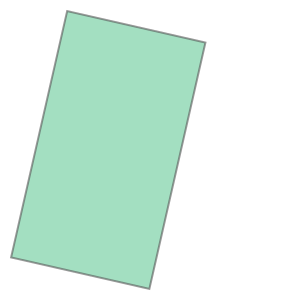

In [52]:
data.dissolve().minimum_rotated_rectangle().geometry[0]

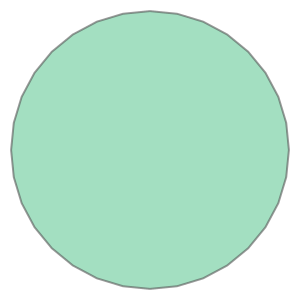

In [53]:
data.dissolve().minimum_bounding_circle().geometry[0]

In [54]:
c_hull = data.convex_hull

c_hull

0      POLYGON ((616870.883 3337909.895, 616852.964 3...
1      POLYGON ((619496.705 3358797, 618962.703 33590...
2      POLYGON ((619848.5 3340875.421, 619811.394 334...
3      POLYGON ((622145.426 3350329.32, 622132.429 33...
4      POLYGON ((623931.77 3343015.679, 622426.307 33...
                             ...                        
125    POLYGON ((625445.132 3355127.815, 625431.176 3...
126    POLYGON ((623931.77 3343015.679, 625702.259 33...
127    POLYGON ((626799.662 3353272.89, 626699.455 33...
128    POLYGON ((627701.826 3348785.51, 626421.376 33...
129    POLYGON ((627808.78 3353722.268, 627250.723 33...
Length: 130, dtype: geometry

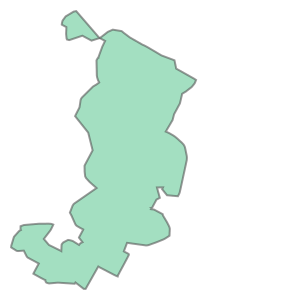

In [55]:
c_hull.union_all()

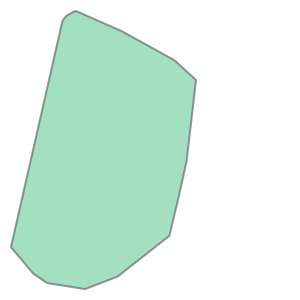

In [58]:
data.union_all().convex_hull

In [60]:
data.concave_hull().head()

0    POLYGON ((616686.447 3341251.083, 616689.559 3...
1    POLYGON ((619414.904 3360602.695, 619418.528 3...
2    POLYGON ((620165.029 3343417.634, 620177.845 3...
3    POLYGON ((622361 3352408.88, 622364.565 335241...
4    POLYGON ((621654.405 3344983.596, 621630.247 3...
dtype: geometry

<Axes: >

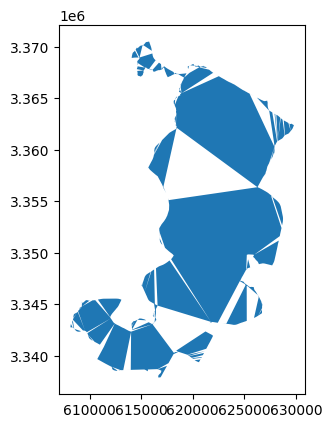

In [61]:
concave_hull = data.dissolve().concave_hull()
concave_hull.plot()

<Axes: >

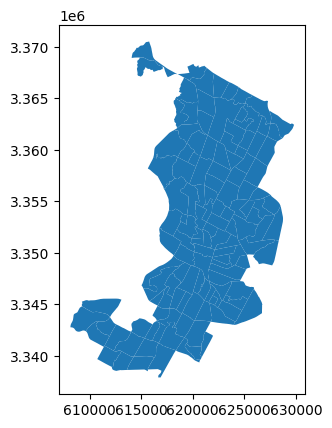

In [62]:
data.plot()

In [65]:
gdf_union = data.dissolve()

# Ratio 0.05
concave_hull_a = gdf_union.concave_hull(ratio=0.05)

# Ratio 0.2
concave_hull_b = gdf_union.concave_hull(ratio=0.2)

# Ratio 0.4
concave_hull_c = gdf_union.concave_hull(ratio=0.4)

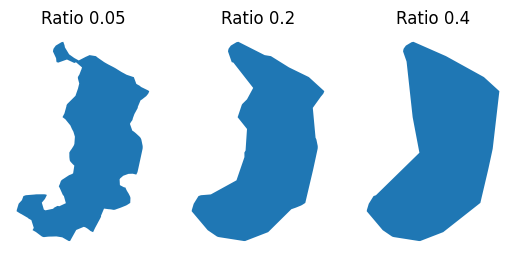

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)

concave_hull_a.plot(ax=ax1)
concave_hull_b.plot(ax=ax2)
concave_hull_c.plot(ax=ax3)

# Remove axis texts
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

# Add titles
ax1.set_title("Ratio 0.05")
ax2.set_title("Ratio 0.2")
ax3.set_title("Ratio 0.4");

In [68]:
data.simplify(tolerance=1000).head()

0    POLYGON ((615643.487 3338728.496, 616689.559 3...
1    POLYGON ((619496.705 3358797, 619418.528 33606...
2    POLYGON ((619200.163 3341784.654, 620177.845 3...
3    POLYGON ((621623.757 3350508.165, 622387.916 3...
4    POLYGON ((621630.247 3345130.744, 624133.189 3...
dtype: geometry

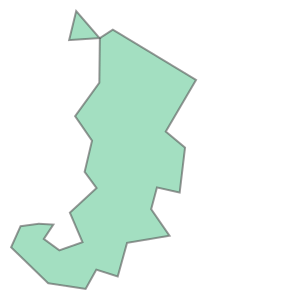

In [69]:
data.union_all().simplify(tolerance=1000)

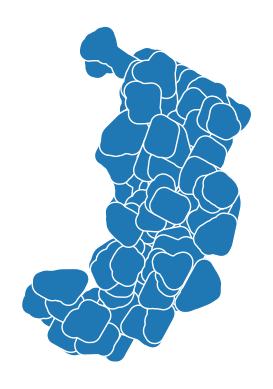

In [70]:
data.buffer(1000).plot(edgecolor="white")

plt.axis("off")
plt.show()

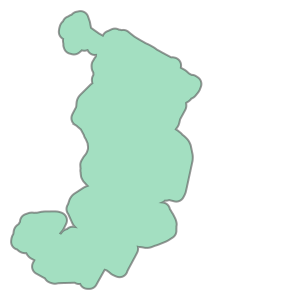

In [72]:
data.union_all().buffer(1000)

In [73]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


In [74]:
data["dense"] = 0

In [75]:
data['area_km2'] = data.area / 1000000

In [76]:
data.head()

,pop2019,tract,geometry,dense,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208


In [79]:
data["pop_density"] = data["pop2019"] / data["area_km2"]

In [80]:
data.head()

,pop2019,tract,geometry,dense,area_km2,pop_densit,pop_density
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655,1887.538655


In [81]:
data.drop(columns=['pop_densit'], inplace=True)

In [82]:
data.head()

,pop2019,tract,geometry,dense,area_km2,pop_density
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655


In [83]:
data.loc[data["pop_density"] > data["pop_density"].mean(), "dense"] = 1

In [84]:
data.head()

,pop2019,tract,geometry,dense,area_km2,pop_density
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655


In [85]:
data.dense.value_counts()

dense
0    86
1    44
Name: count, dtype: int64

In [86]:
dissolved = data[["pop2019", "area_km2", "dense", "geometry"]].dissolve(by="dense", aggfunc="sum")

In [87]:
dissolved

,geometry,pop2019,area_km2
dense,,,
0,"MULTIPOLYGON (((614108.23 3339640.551, 614288....",368992.0,231.131494
1,"MULTIPOLYGON (((612263.531 3338931.8, 612265.2...",242943.0,71.234570


In [88]:
dissolved = dissolved.reset_index()

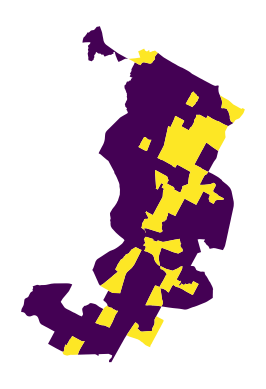

In [89]:
dissolved.plot(column="dense")

plt.axis("off")
plt.show()

(np.float64(606805.2992682776),
 np.float64(631448.5067287987),
 np.float64(3336059.7178814416),
 np.float64(3372363.7574334145))

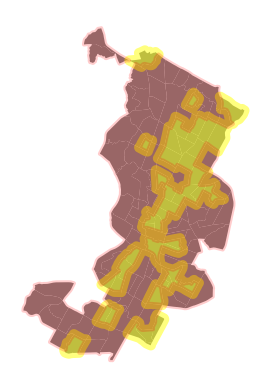

In [94]:
ax1 = data.plot(color="grey")

dissolved.loc[dissolved["dense"] == 1].buffer(500).plot(ax=ax1, color="yellow", alpha=0.5)

dissolved.loc[dissolved["dense"] == 0].buffer(200).plot(ax=ax1, color="red", alpha=0.2)

ax1.axis("off")


In [95]:
data_copy = data.copy()
data_copy.head()

,pop2019,tract,geometry,dense,area_km2,pop_density
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655


In [97]:
data_copy["centroid"] = data.centroid
data_copy.head()

,pop2019,tract,geometry,dense,area_km2,pop_density,centroid
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769,POINT (616990.19 3339736.002)
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408,POINT (619378.303 3359650.002)
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183,POINT (620418.753 3342194.171)
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868,POINT (622613.506 3351414.386)
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655,POINT (622605.359 3343869.554)


In [98]:
data_copy = data_copy.set_geometry("centroid")
data_copy.head()

,pop2019,tract,geometry,dense,area_km2,pop_density,centroid
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",0,4.029772,1506.288769,POINT (616990.19 3339736.002)
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",0,1.532030,1437.961408,POINT (619378.303 3359650.002)
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",0,3.960344,1873.322183,POINT (620418.753 3342194.171)
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",0,2.181762,1938.341868,POINT (622613.506 3351414.386)
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",0,2.431208,1887.538655,POINT (622605.359 3343869.554)


<Axes: >

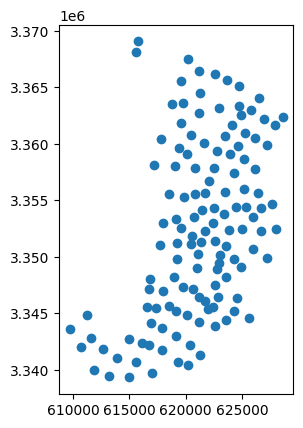

In [99]:
data_copy.plot()

In [100]:
data_copy.geometry.name

'centroid'

2.5